In [1]:
import os
os.chdir('..')
!pwd
import bilevel
from bilevel.build_all_models import *
from bilevel.OnlineLinearExpert import *
from bilevel.OnlineTreeExpert import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/jupyter-kriach/md_github_lat/multigroupcode/multigroup-code


In [13]:
%%time
df_adult = pd.read_csv('./data_small/adult_reconstruction.csv')

numeric_all = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'education-num', 'income']
cat_feat =  ['workclass', 'marital-status', 'relationship', 'native-country', 'occupation', 'race', 'sex']

df_adult.drop(['education'], axis = 1, inplace=True)
df_adult_mm = numeric_scaler(df_adult, numeric_all)
df_adult_mm_oh = one_hot(df_adult_mm, cat_feat)
df_adult_mm_oh.drop(cat_feat, axis = 1, inplace=True) # drop the categorics that were used to one hot encode
df_adult_mm_oh = df_adult_mm_oh * 1.0 # make bool true, false into 1.0, 0.0
df_adult_mm_oh.head()

A_t_age = pd.concat([df_adult['age'] <= 35,  # young
        (df_adult['age'] > 35) & (df_adult['age'] <= 50), # middle
        df_adult['age'] > 50], # old
             axis = 1, keys = ['young', 'middle', 'old'])

A_t_edu = pd.concat([df_adult['education-num'] <= 9, df_adult['education-num'] >= 10], axis = 1, 
                keys = ['HighSchool&less', 'College&more'])

A_t_sex = pd.concat([df_adult['sex'] == 'Male', df_adult['sex'] == 'Female'], axis = 1, keys = ['Male', 'Female'])

A_t_race = pd.concat([df_adult['race'] == 'White', df_adult['race'] == 'Asian-Pac-Islander',
                      df_adult['race'] == 'Amer-Indian-Eskimo', df_adult['race'] == 'Other',
                      df_adult['race'] == 'Black'], axis = 1, keys = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'])

A_t_adult_groups = pd.concat([A_t_age, A_t_edu, A_t_sex, A_t_race], axis=1)
A_t_adult_groups['always_on'] = True
A_t_adult_groups *= 1
A_t_adult_groups.sum(axis=0)

CPU times: user 124 ms, sys: 3.83 ms, total: 127 ms
Wall time: 126 ms


young                 22792
middle                16881
old                    9858
HighSchool&less       22584
College&more          26947
Male                  33174
Female                16357
White                 42441
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      471
Other                   406
Black                  4694
always_on             49531
dtype: int64

In [6]:
%%time
from bilevel.Groupwise_seedruns import BuildGroupwise_diffseeds
ds_obj = BuildGroupwise_diffseeds(df_adult_mm_oh, 'income', A_t_adult_groups)
ds_obj.build_all_seeds()
ds_obj.build_df_res()

100%|██████████| 49531/49531 [00:18<00:00, 2647.87it/s]


CPU times: user 30min 57s, sys: 1min 11s, total: 32min 9s
Wall time: 4min 2s


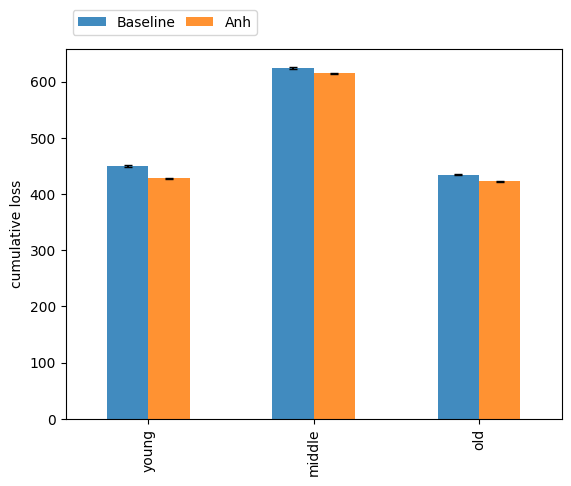

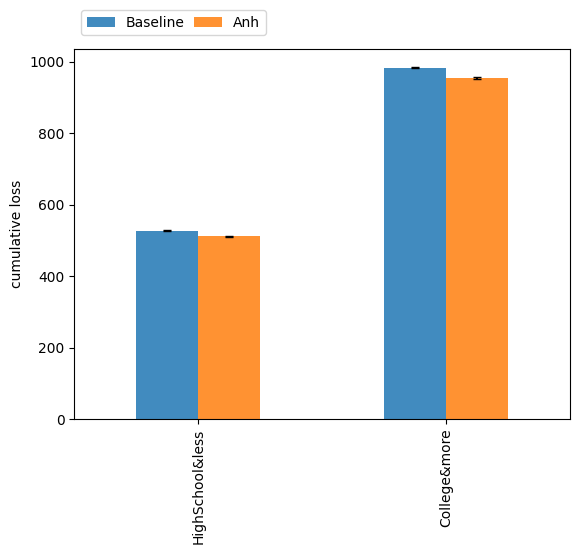

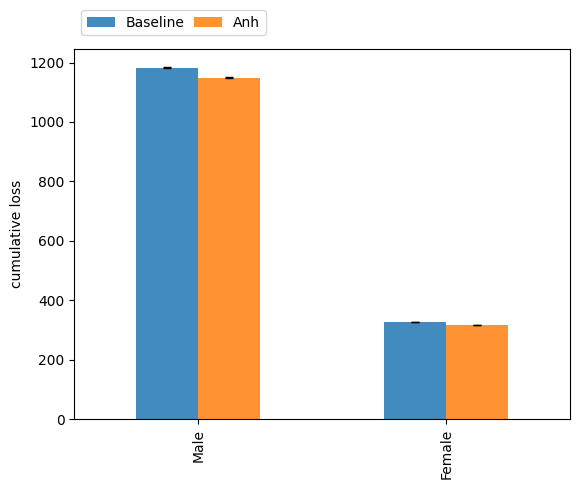

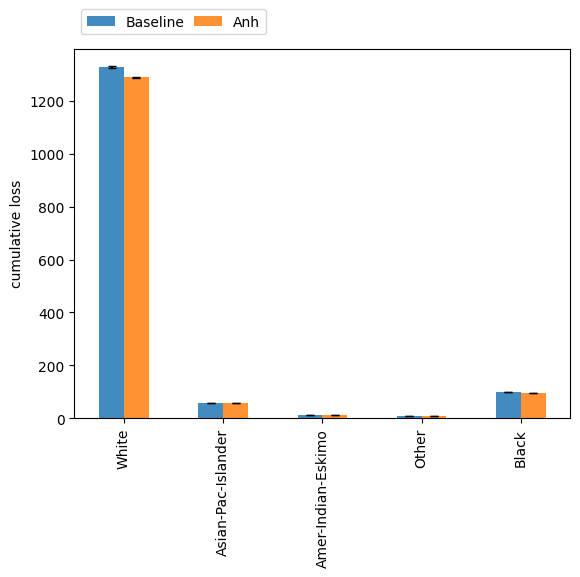

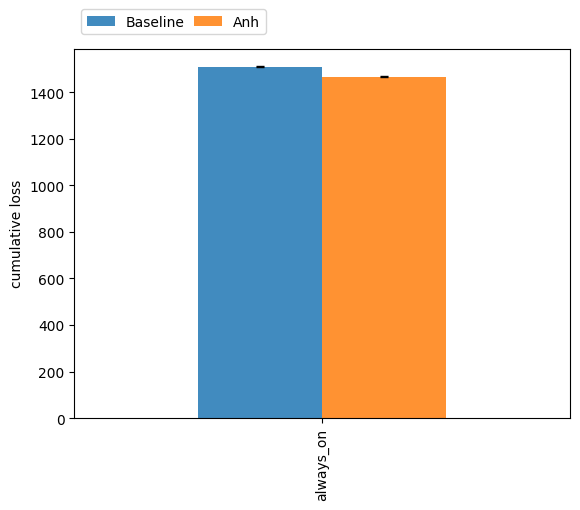

In [9]:
subgroups_list = [['young', 'middle', 'old'], ['HighSchool&less', 'College&more'], ['Male', 'Female'],
['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'], ['always_on']]

from bilevel.Groupwise_seedruns import plot_subgroups
plot_subgroups(ds_obj, subgroups_list)


In [5]:
pd.concat([plot_ob.df_base_meansd, plot_ob.df_Anh_meansd], axis=1)

,mean_base,std_base,mean_Anh,std_Anh
young,450.168510,1.276885,428.277620,0.847336
middle,624.831559,1.705613,614.592733,1.611411
old,434.394247,1.149837,422.683228,1.412409
HighSchool&less,526.493605,1.094041,511.408555,1.089702
College&more,982.900711,1.998353,954.145025,1.724671
Male,1182.621030,2.315097,1149.271282,1.681161
Female,326.773286,0.503465,316.282298,0.891207
White,1326.996324,2.398741,1287.520499,2.090025
Asian-Pac-Islander,59.481154,0.288898,58.263756,0.465740
Amer-Indian-Eskimo,12.380835,0.144627,12.317055,0.236884


In [4]:
%%time
ds_obj.build_regret_curve()

CPU times: user 10min 20s, sys: 24.1 s, total: 10min 44s
Wall time: 1min 20s


In [2]:
import pickle
# with open('adult_gw_ob.pkl', 'wb') as handle:
#     pickle.dump(ds_obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
with open('adult_gw_ob.pkl', 'rb') as handle:
    ds_obj = pickle.load(handle)

young 22792


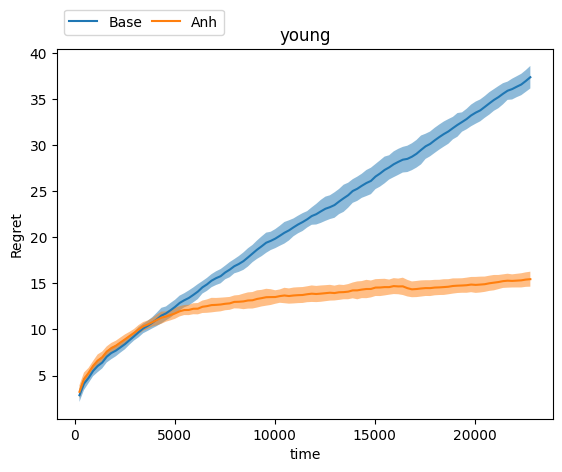

middle 16881


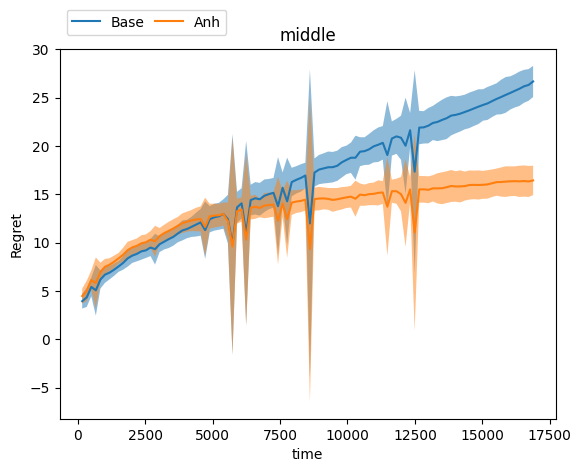

old 9858


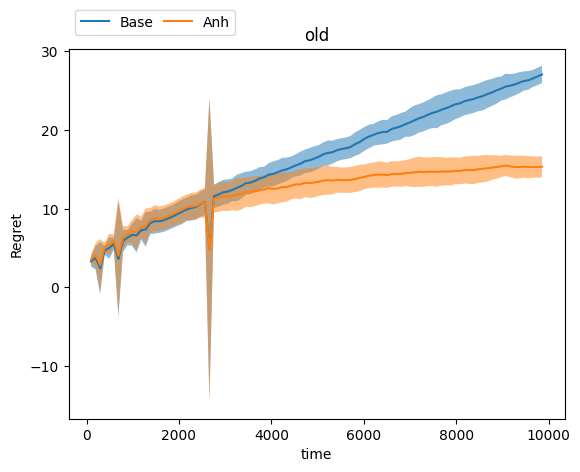

HighSchool&less 22584


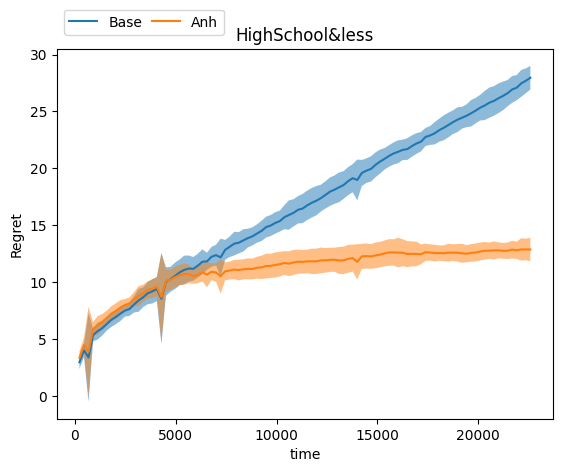

College&more 26947


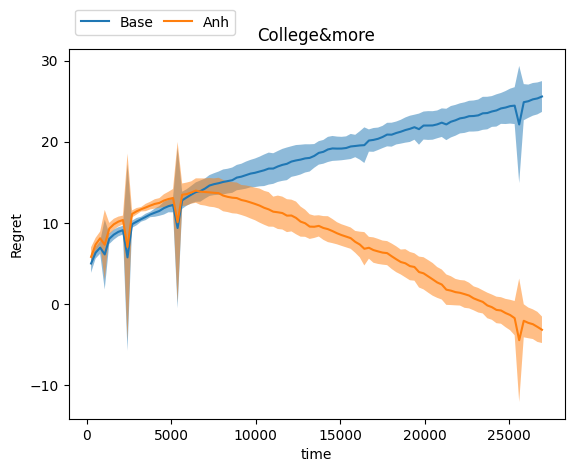

Male 33174


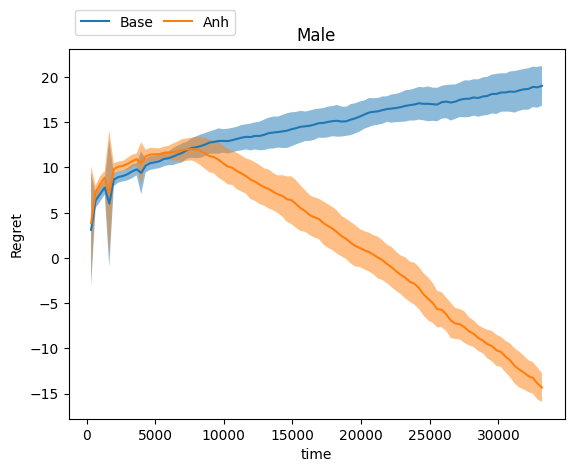

Female 16357


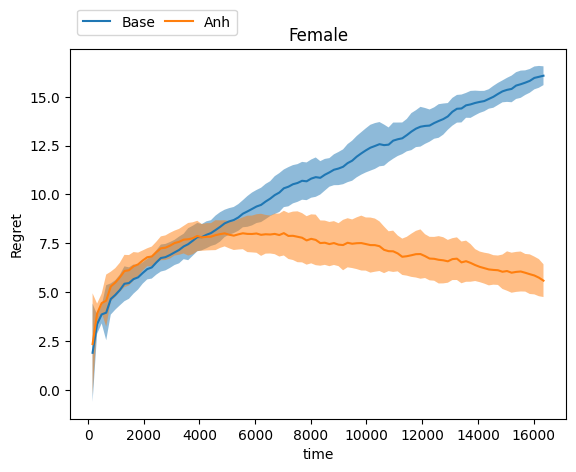

White 42441


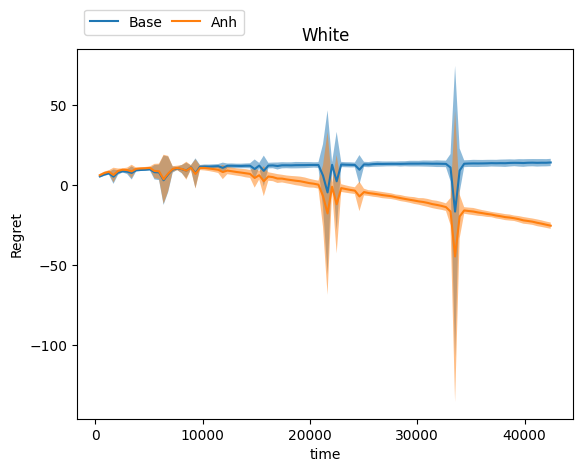

Asian-Pac-Islander 1519


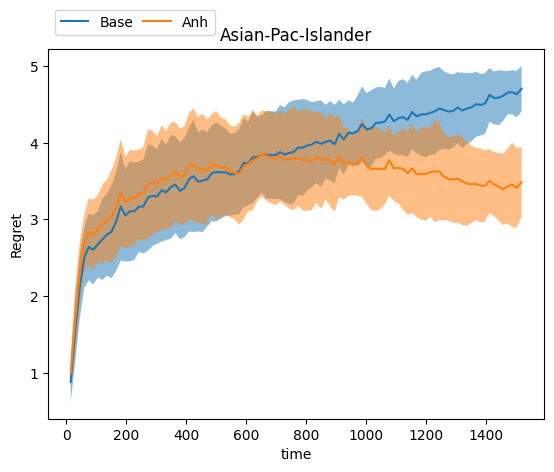

Amer-Indian-Eskimo 471


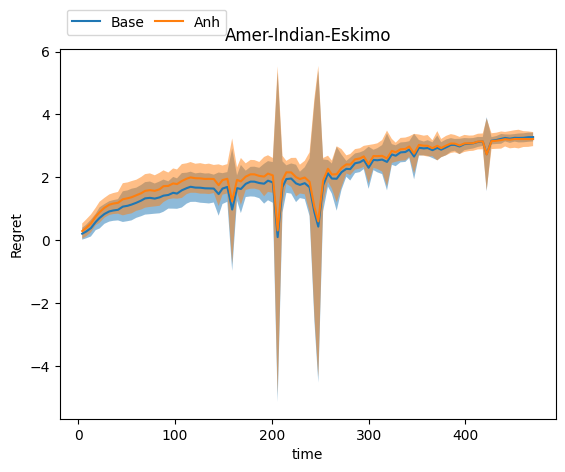

Other 406


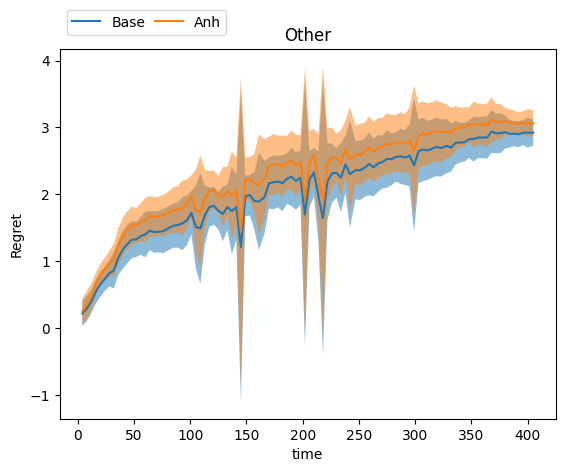

Black 4694


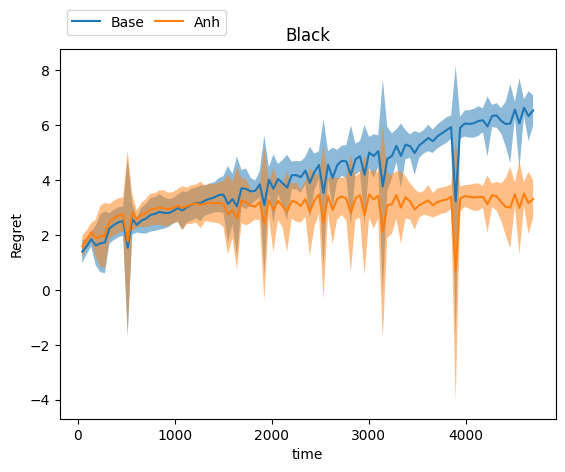

always_on 49531


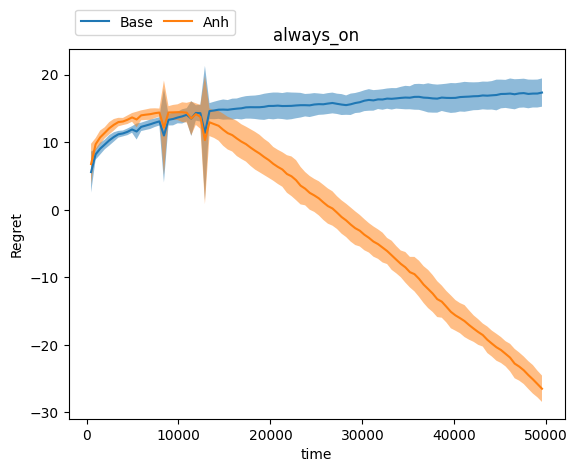

In [5]:
from bilevel.Groupwise_seedruns import plot_regret_curve_with_std # with clipped y_vals of the least squares predictor
plot_regret_curve_with_std(ds_obj)

young 22792


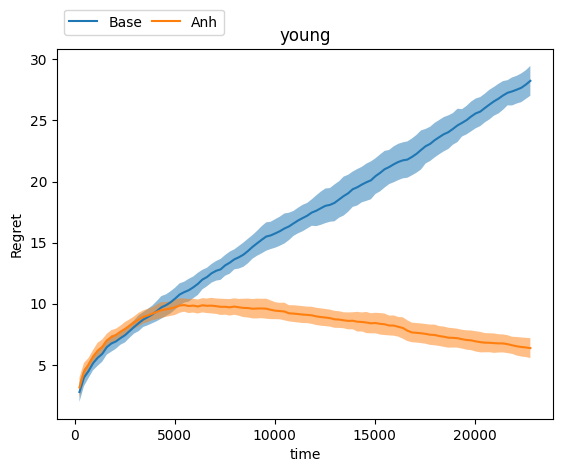

middle 16881


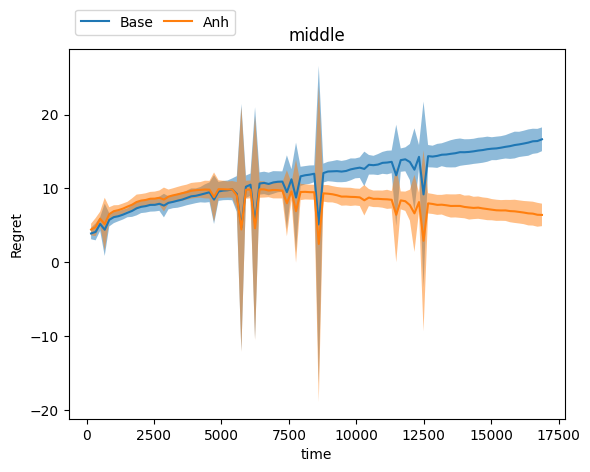

old 9858


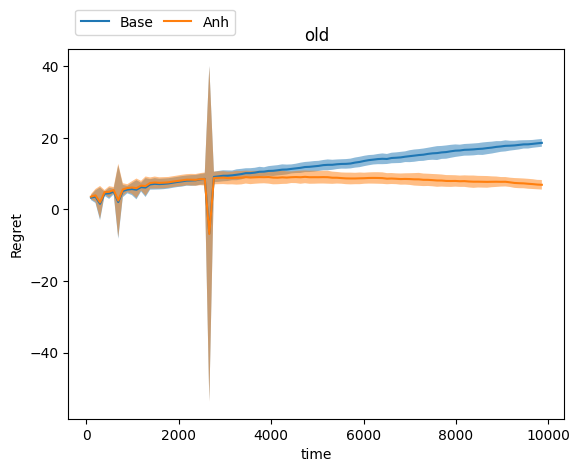

HighSchool&less 22584


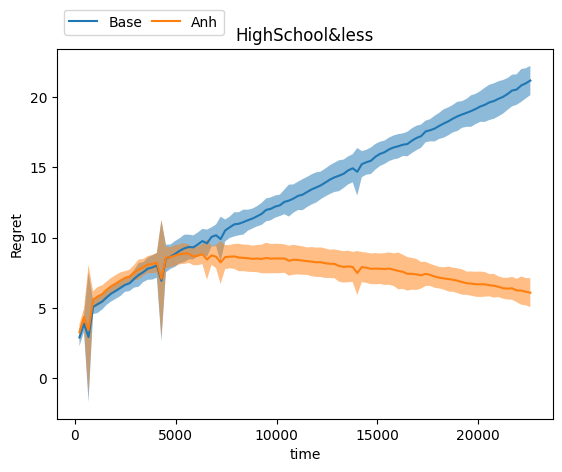

College&more 26947


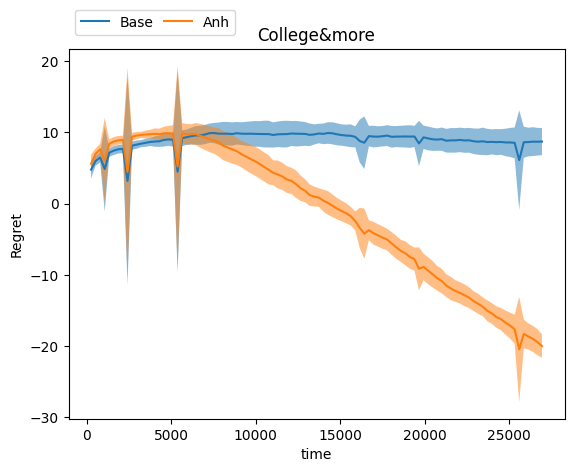

Male 33174


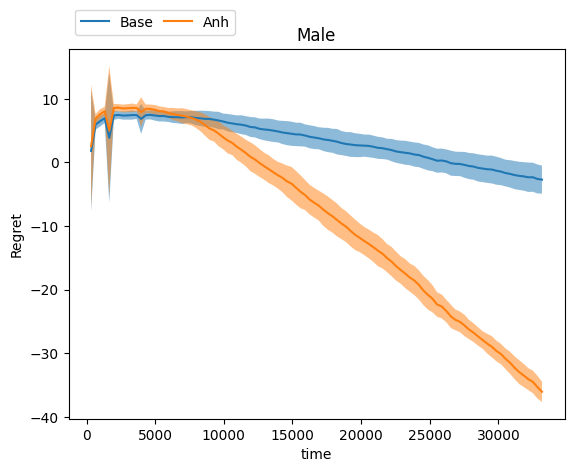

Female 16357


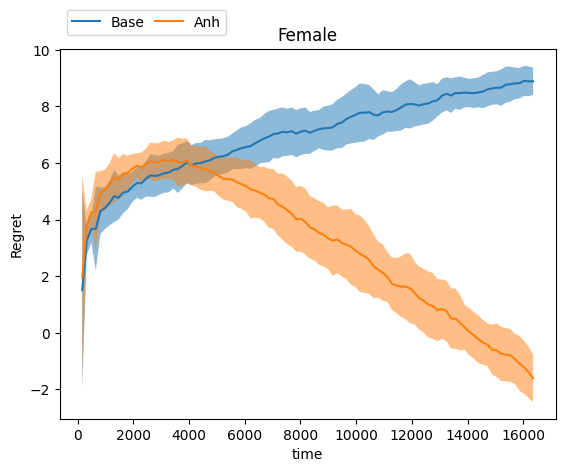

White 42441


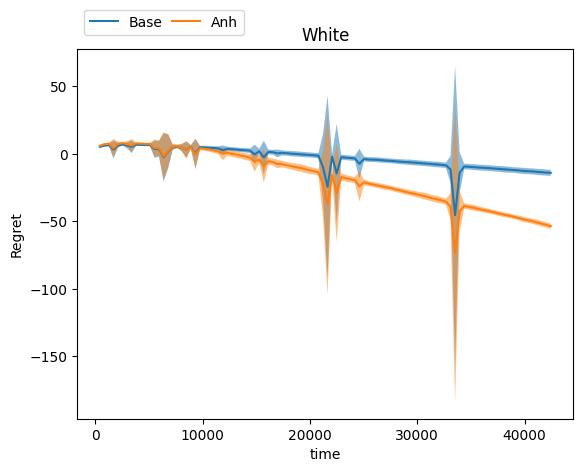

Asian-Pac-Islander 1519


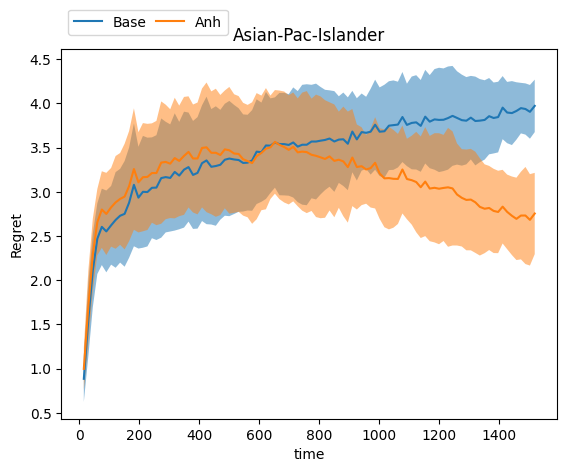

Amer-Indian-Eskimo 471


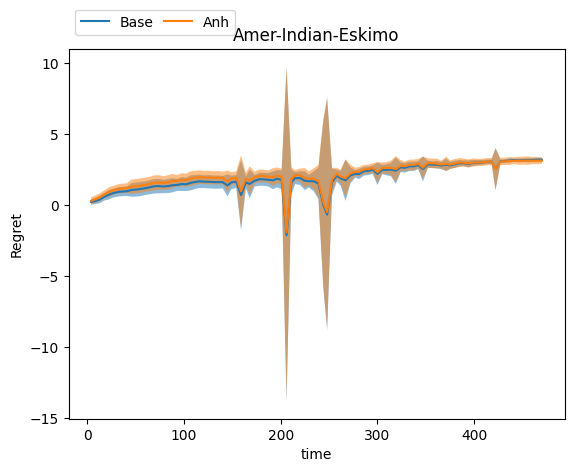

Other 406


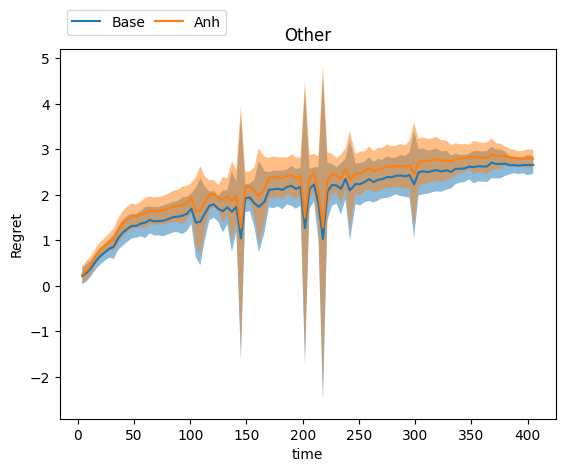

Black 4694


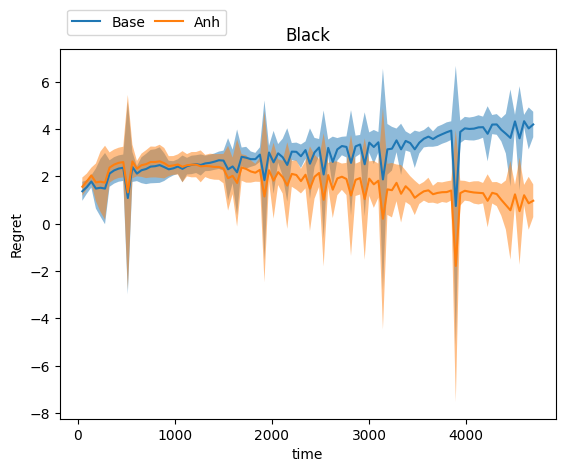

always_on 49531


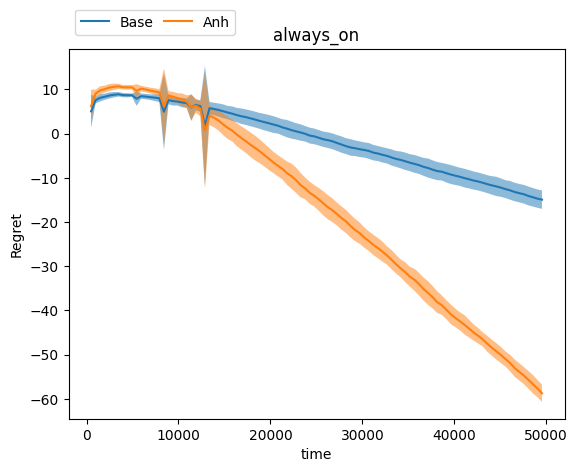

In [12]:
from bilevel.Groupwise_seedruns import plot_regret_curve_with_std
plot_regret_curve_with_std(ds_obj)

In [ ]:
# Testing best in hindsight vs ridge batch

In [14]:
df_adult_mm_oh

,hours-per-week,age,capital-gain,capital-loss,education-num,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.193878,0.315068,0.00000,0.0,0.800000,0.490460,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.397959,0.054795,0.00000,0.0,0.600000,0.114053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.091837,0.000000,0.00000,0.0,0.400000,0.024957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.500000,0.465753,0.00000,0.0,0.533333,0.389320,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.377551,0.150685,0.00000,0.0,0.800000,0.413376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49526,0.653061,0.246575,0.00000,0.0,0.800000,0.850649,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
49527,0.775510,0.273973,0.03137,0.0,0.800000,0.340668,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
49528,0.551020,0.095890,0.00000,0.0,0.666667,0.129230,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
49529,0.397959,0.095890,0.00000,0.0,0.600000,0.149091,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
df_adult_mm_oh.columns

Index(['hours-per-week', 'age', 'capital-gain', 'capital-loss',
       'education-num', 'income', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'native-country_?',
       'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador

In [16]:
X_dat = df_adult_mm_oh.drop('income', axis=1)
y_dat = df_adult_mm_oh['income']

from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
lr = LinearRegression()

In [17]:
a = np.array([-1,2,0.4])
np.clip(a, 0,1)

array([0. , 1. , 0.4])